# Query 2.1
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
df = pd.read_csv("Module1solution.csv")
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,0,TATAPOWER,EQ,2017-05-15,82.30,82.55,83.80,82.15,83.55,83.55,...,2007841,1.663515e+08,13315,796744,39.68,5,2017,83.550000,0.000000,Slight or No change
1,1,TATAPOWER,EQ,2017-05-16,83.55,83.90,85.95,83.40,83.70,83.85,...,5141578,4.329310e+08,23193,2125318,41.34,5,2017,83.765748,0.003591,Slight or No change
2,2,TATAPOWER,EQ,2017-05-17,83.85,84.00,86.00,83.60,85.15,85.35,...,5499293,4.669814e+08,32097,2264851,41.18,5,2017,84.454535,0.017889,Slight or No change
3,3,TATAPOWER,EQ,2017-05-18,85.35,84.75,85.60,83.50,83.80,83.75,...,2296399,1.940177e+08,6983,1217618,53.02,5,2017,84.346279,-0.018746,Slight or No change
4,4,TATAPOWER,EQ,2017-05-19,83.75,84.40,85.45,83.05,83.90,84.15,...,6222693,5.229199e+08,19269,1918659,30.83,5,2017,84.288579,0.004776,Slight or No change


In [3]:
df['Date'].dtype

dtype('O')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [5]:
df.set_index('Date', inplace = True)

In [6]:
df.head()

,Unnamed: 0,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,TATAPOWER,EQ,82.30,82.55,83.80,82.15,83.55,83.55,82.85,2007841,1.663515e+08,13315,796744,39.68,5,2017,83.550000,0.000000,Slight or No change
2017-05-16,1,TATAPOWER,EQ,83.55,83.90,85.95,83.40,83.70,83.85,84.20,5141578,4.329310e+08,23193,2125318,41.34,5,2017,83.765748,0.003591,Slight or No change
2017-05-17,2,TATAPOWER,EQ,83.85,84.00,86.00,83.60,85.15,85.35,84.92,5499293,4.669814e+08,32097,2264851,41.18,5,2017,84.454535,0.017889,Slight or No change
2017-05-18,3,TATAPOWER,EQ,85.35,84.75,85.60,83.50,83.80,83.75,84.49,2296399,1.940177e+08,6983,1217618,53.02,5,2017,84.346279,-0.018746,Slight or No change
2017-05-19,4,TATAPOWER,EQ,83.75,84.40,85.45,83.05,83.90,84.15,84.03,6222693,5.229199e+08,19269,1918659,30.83,5,2017,84.288579,0.004776,Slight or No change


In [7]:
del df['Unnamed: 0']

In [8]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,
2017-05-15,TATAPOWER,EQ,82.30,82.55,83.80,82.15,83.55,83.55,82.85,2007841,1.663515e+08,13315,796744,39.68,5,2017,83.550000,0.000000,Slight or No change
2017-05-16,TATAPOWER,EQ,83.55,83.90,85.95,83.40,83.70,83.85,84.20,5141578,4.329310e+08,23193,2125318,41.34,5,2017,83.765748,0.003591,Slight or No change
2017-05-17,TATAPOWER,EQ,83.85,84.00,86.00,83.60,85.15,85.35,84.92,5499293,4.669814e+08,32097,2264851,41.18,5,2017,84.454535,0.017889,Slight or No change
2017-05-18,TATAPOWER,EQ,85.35,84.75,85.60,83.50,83.80,83.75,84.49,2296399,1.940177e+08,6983,1217618,53.02,5,2017,84.346279,-0.018746,Slight or No change
2017-05-19,TATAPOWER,EQ,83.75,84.40,85.45,83.05,83.90,84.15,84.03,6222693,5.229199e+08,19269,1918659,30.83,5,2017,84.288579,0.004776,Slight or No change


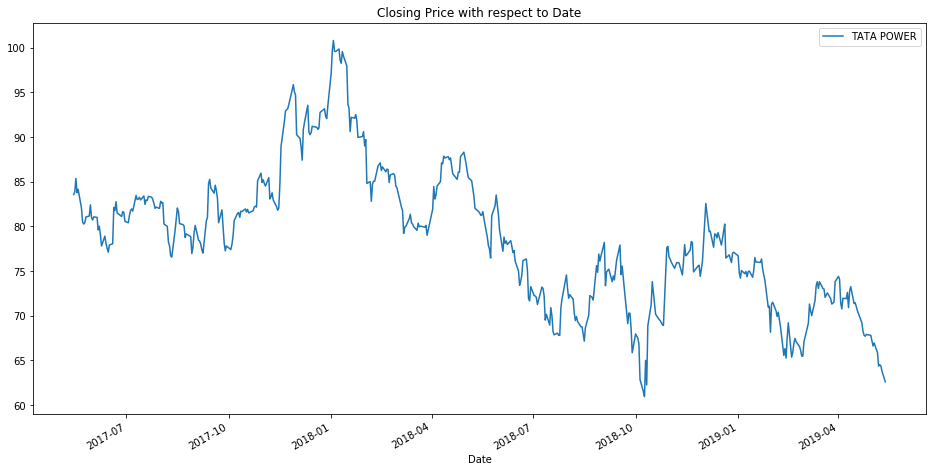

In [9]:
# Plot the close price of the day with the entire dataframe
df['Close Price'].plot(label = 'TATA POWER', figsize = (16,8), title ='Closing Price with respect to Date')
plt.legend()

# Query 2.2
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change

<StemContainer object of 3 artists>

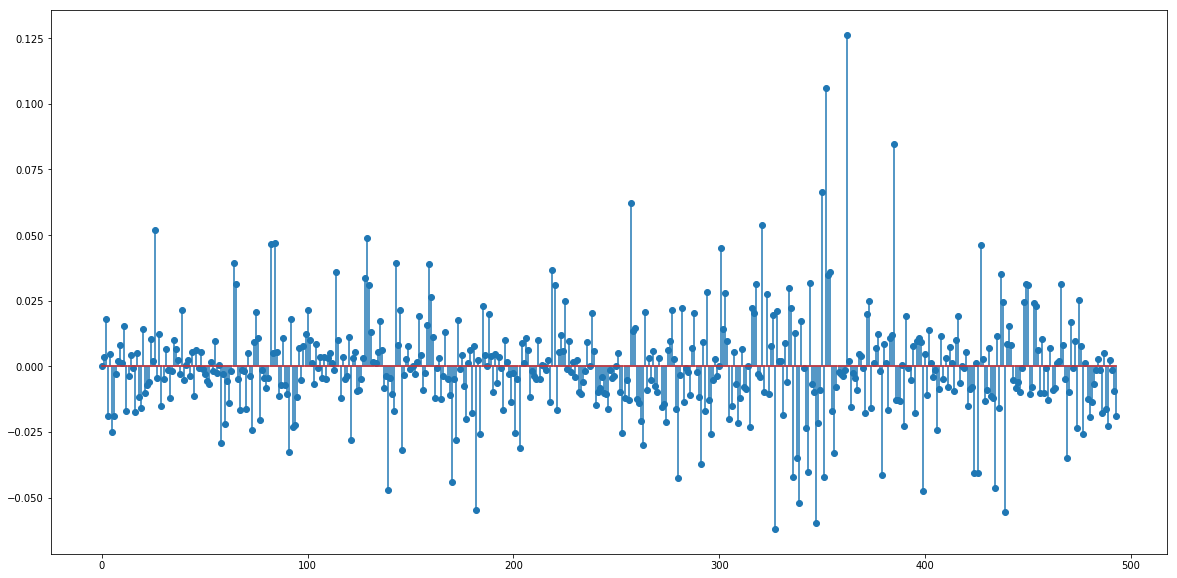

In [10]:
plt.figure(figsize=(20,10))
plt.stem( df['Day_Perc_Change'])

# Query 2.3
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

<StemContainer object of 3 artists>

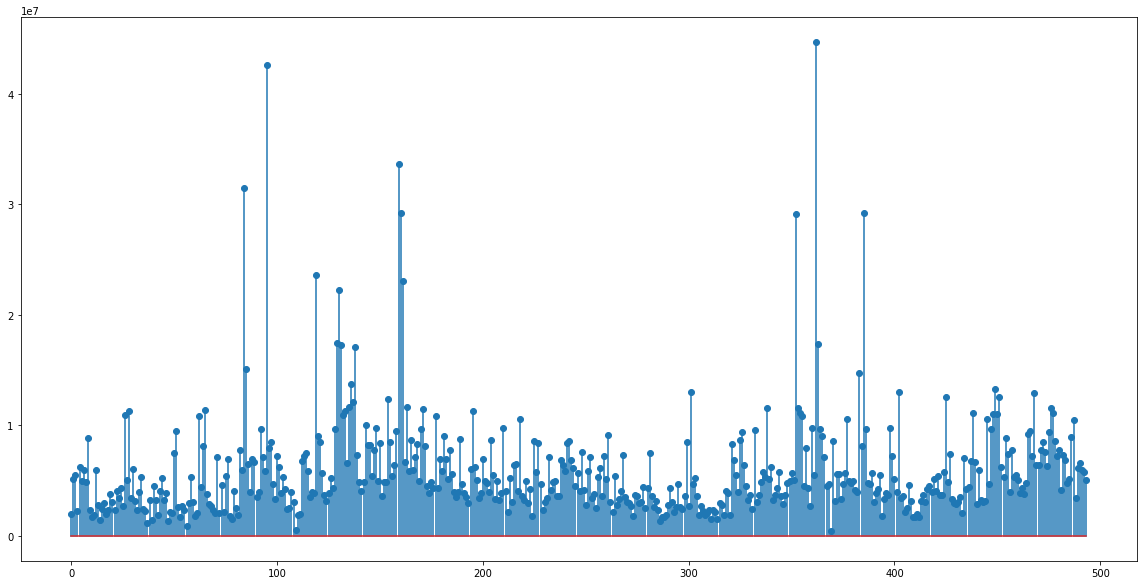

In [11]:
plt.figure(figsize = (20,10))
plt.stem(df['Total Traded Quantity'])

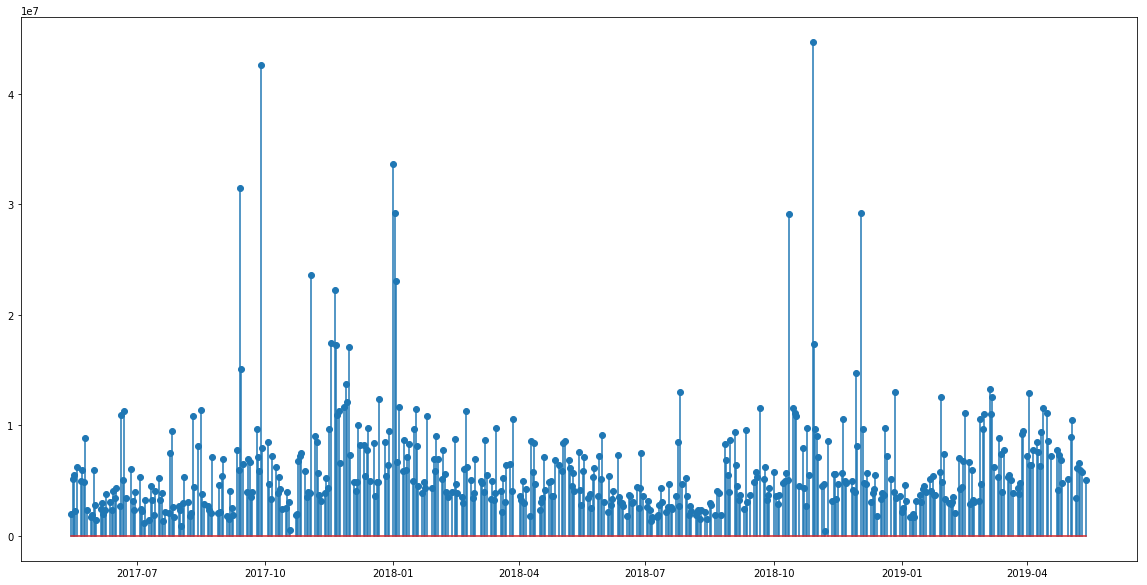

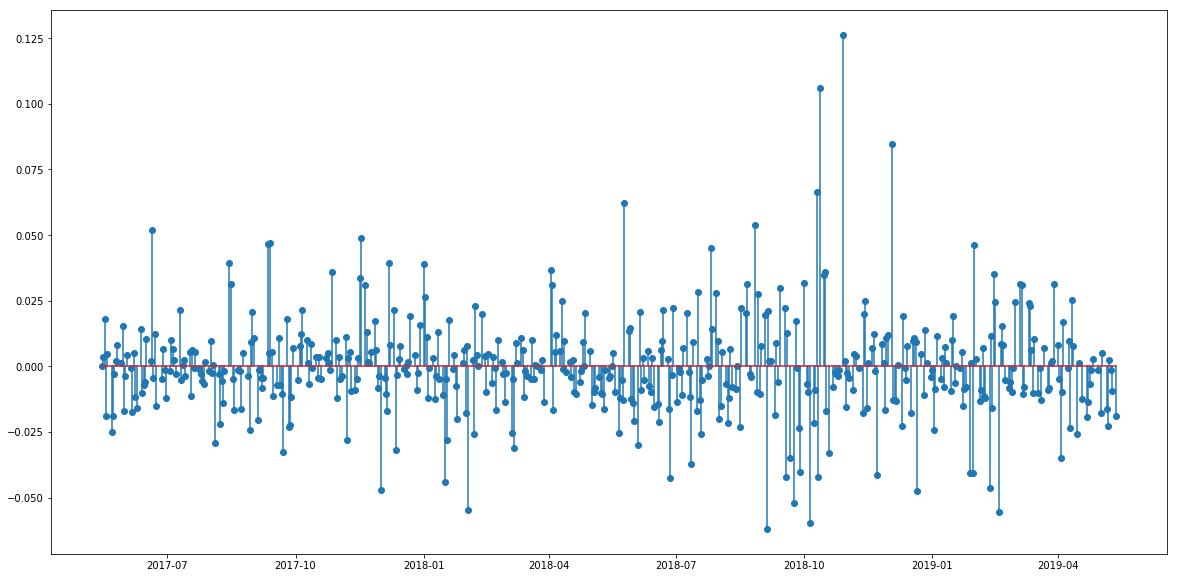

In [12]:
plt.figure(figsize = (20,10))
plt.stem(df.index.values, df['Total Traded Quantity'])
plt.show()
plt.figure(figsize = (20,10))
plt.stem(df.index.values, df['Day_Perc_Change'])
plt.show()

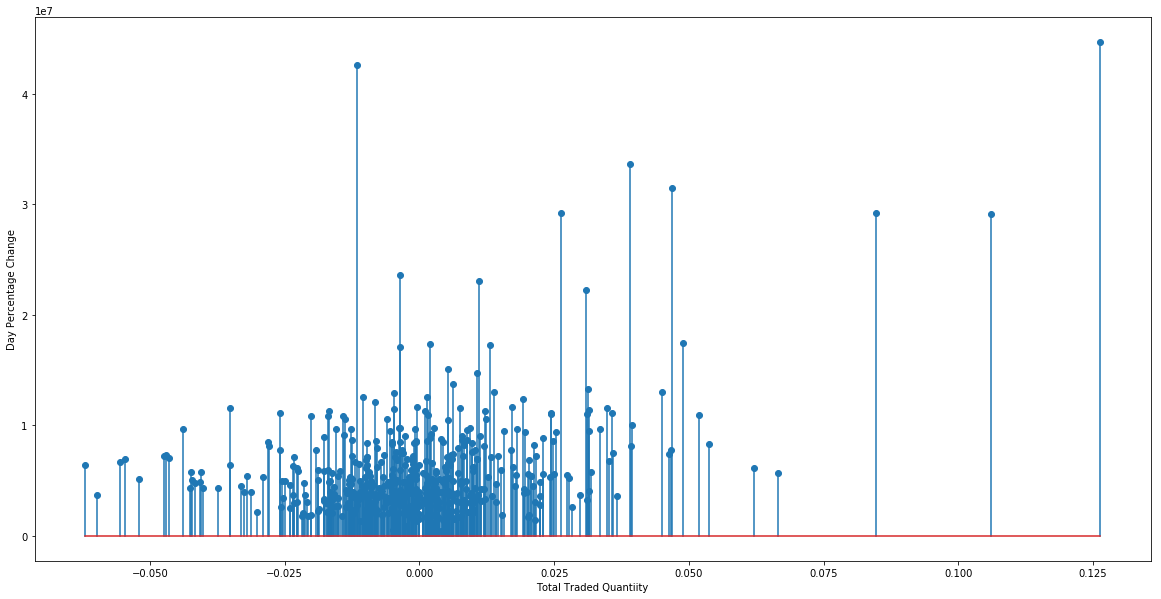

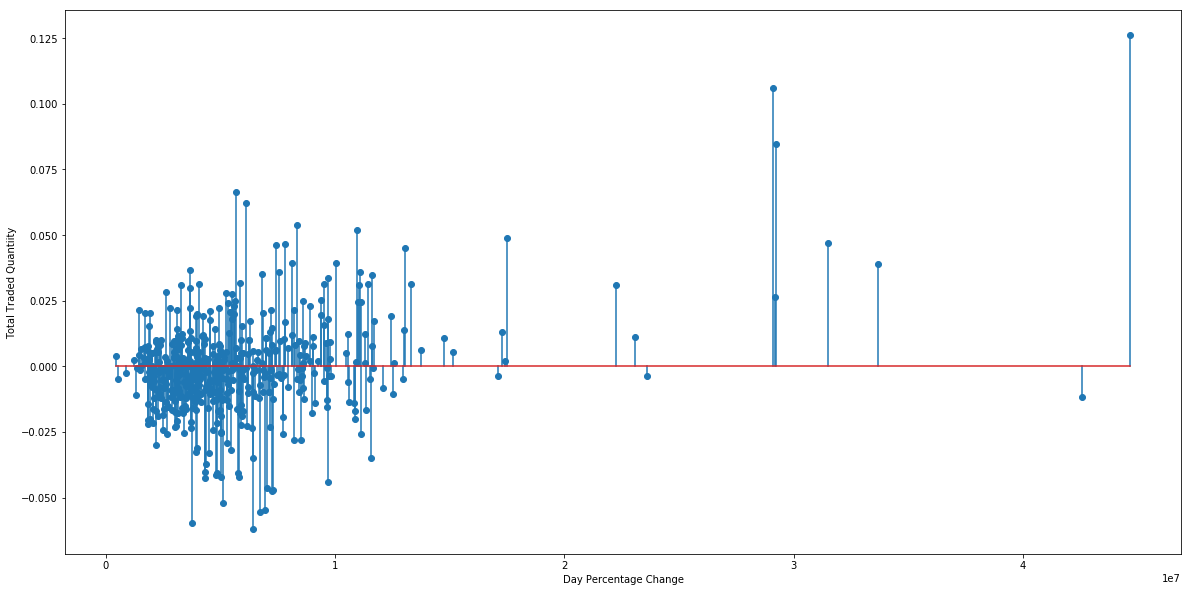

In [13]:
plt.figure(figsize=(20,10))
plt.stem(df['Day_Perc_Change'],df['Total Traded Quantity'])
plt.ylabel("Day Percentage Change")
plt.xlabel("Total Traded Quantiity")
plt.show()
plt.figure(figsize=(20,10))
plt.stem(df['Total Traded Quantity'],df['Day_Perc_Change'])
plt.xlabel("Day Percentage Change")
plt.ylabel("Total Traded Quantiity")
plt.show()
plt.close()

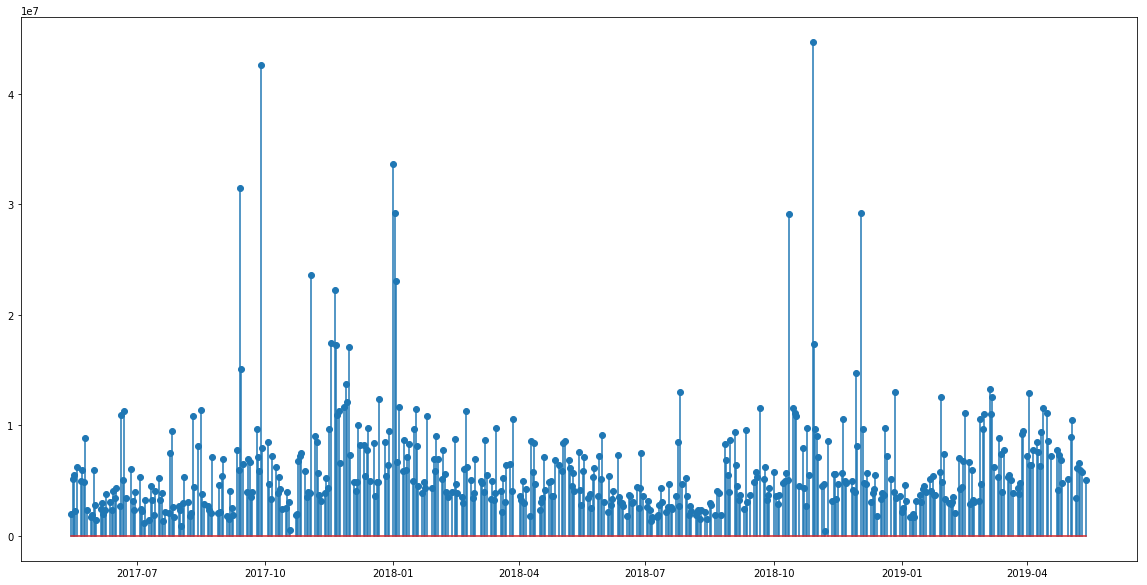

In [14]:
plt.figure(figsize = (20, 10))
plt.stem(df.index.values, df['Total Traded Quantity'])
plt.show()

# Query 2.4
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [16]:
TradeShare = ['Postive','Negative','Breakout Bull','Breakout Bear','Among top losers','Among top gainers','Slight or No Change','Slight Positive','Slight Negative']
Trend_to_list = df['Trend'].tolist()
counts = Counter(Trend_to_list)
counts

Counter({'Slight or No change': 494})

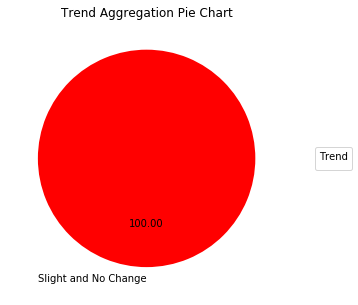

In [27]:
counter = [494]
label = ['Slight and No Change']
color = ['r']
plt.figure(figsize = (15,5))
plt.title("Trend Aggregation Pie Chart")
plt.legend(counter,
          title="Trend",
          loc="center left", bbox_to_anchor=(1.1, 0, 0.5, 1))
plt.pie(counter, labels = label, colors = color, startangle = 90, autopct = '%.2f')
plt.show()

In [28]:
ndf = df.groupby(['Trend'])['Total Traded Quantity']
ndf.describe()

,count,mean,std,min,25%,50%,75%,max
Trend,,,,,,,,
Slight or No change,494.0,5.897024e+06,4.767900e+06,437631.0,3272306.25,4756478.0,7141946.25,44673883.0


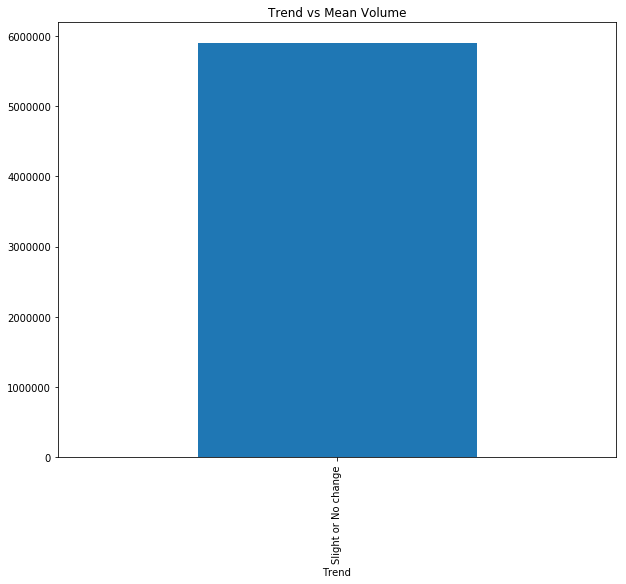

In [37]:
plt.figure(figsize = (10, 8))
plt.title("Trend vs Mean Volume")
plt.xlabel = 'Trend'
plt.ylabel = 'Volume'
df.groupby(['Trend'])['Total Traded Quantity'].mean().plot.bar()

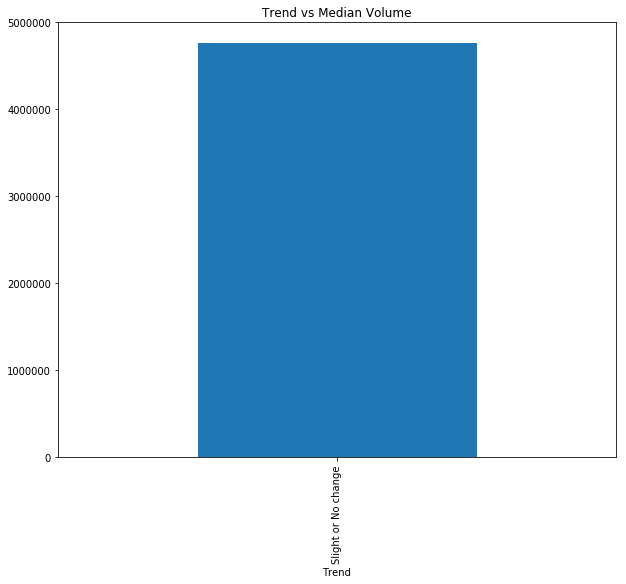

In [38]:
plt.figure(figsize = (10, 8))
plt.title("Trend vs Median Volume")
plt.xlabel = 'Trend'
plt.ylabel = 'Volume'
df.groupby(['Trend'])['Total Traded Quantity'].median().plot.bar()

# Query 2.5
Plot the daily return (percentage) distribution as a histogram. Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

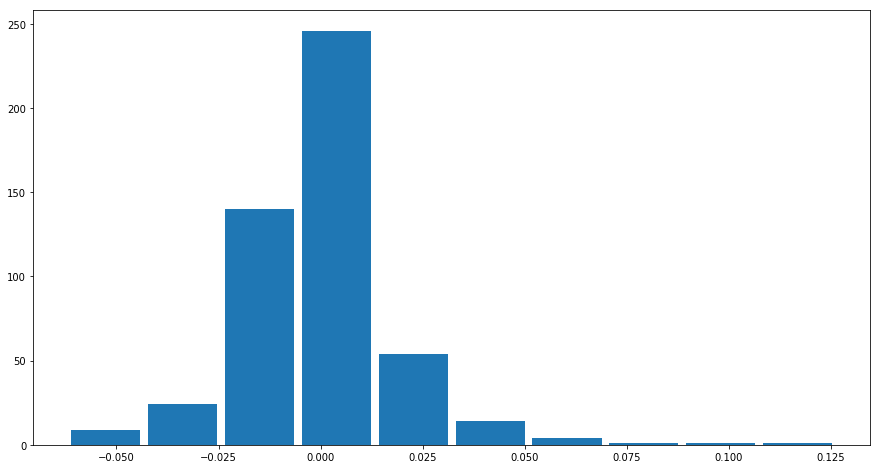

In [46]:
plt.figure(figsize = (15, 8))
plt.hist(df['Day_Perc_Change'], rwidth= 0.9)
plt.show()

# Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe. Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [47]:
tcs = pd.read_csv('TCS.csv')
hdfc = pd.read_csv('HDFC.csv')
itc = pd.read_csv('ITC.csv')
bpcl = pd.read_csv('BPCL.csv')
ioc = pd.read_csv('IOC.csv')

In [49]:
filter_tcs = tcs[tcs.Series == 'EQ']
filter_hdfc = hdfc[hdfc.Series == 'EQ']
filter_itc = itc[itc.Series == 'EQ']
filter_bpcl = bpcl[bpcl.Series == 'EQ']
filter_ioc = ioc[ioc.Series == 'EQ']

In [56]:
columns = ['TCS', 'HDFC', 'ITC', 'BPCL', 'IOC']
close_df = pd.DataFrame(columns = columns)
close_df['TCS'] = filter_tcs['Close Price']
close_df['HDFC'] = filter_hdfc['Close Price']
close_df['ITC'] = filter_itc['Close Price']
close_df['BPCL'] = filter_bpcl['Close Price']
close_df['IOC'] = filter_ioc['Close Price']

In [54]:
close_df.head()

,TCS,HDFC,ITC,BPCL,IOC
0,2365.10,1559.50,277.95,727.85,442.10
1,2429.15,NaN,283.45,733.30,446.60
2,2455.35,1566.55,281.65,727.45,444.25
3,2536.20,1552.50,277.90,714.90,439.90
4,2507.15,NaN,286.20,702.45,435.40


In [59]:
close_df.dropna()
pct_df = close_df.pct_change().fillna(0)
pct_df.dropna()

,TCS,HDFC,ITC,BPCL,IOC
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.027081,0.000000,0.019788,0.007488,0.010179
2,0.010786,0.004521,-0.006350,-0.007978,-0.005262
3,0.032928,-0.008969,-0.013314,-0.017252,-0.009792
4,-0.011454,0.000000,0.029867,-0.017415,-0.010230
5,0.009652,-0.009952,0.060797,-0.009752,-0.023082
6,-0.003812,0.000000,-0.011364,0.005679,-0.002586
7,0.014851,-0.010702,-0.000833,0.017654,0.014850
8,0.025575,0.000000,0.000500,0.021000,0.019510
9,-0.017660,-0.000493,0.030162,0.031368,-0.029388


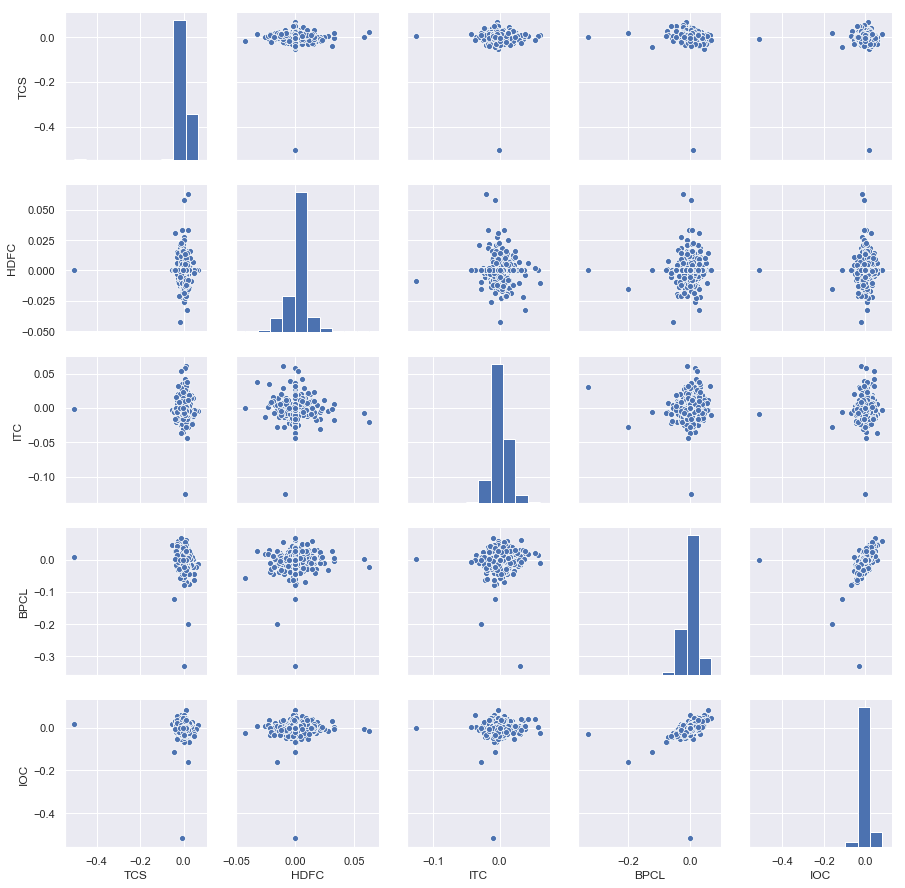

In [60]:
import seaborn as sns
sns.set(color_codes=True)
sns.pairplot(pct_df)

# Query 2.7
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read. You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values. Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [61]:
rolling_avg_tcs = pct_df['TCS'].rolling(7).mean()
rolling_avg_tcs

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6      0.009312
7      0.011433
8      0.011218
9      0.007154
10     0.002151
11     0.002580
12     0.000949
13     0.001886
14     0.000397
15    -0.001082
16     0.006491
17     0.002511
18    -0.001397
19    -0.001972
20    -0.003493
21    -0.006172
22    -0.007261
23    -0.015723
24    -0.012125
25    -0.005105
26    -0.003496
27    -0.004629
28    -0.003261
29    -0.006325
         ...   
468   -0.005117
469   -0.001564
470   -0.001468
471    0.001221
472    0.005238
473    0.006762
474    0.002425
475    0.005885
476    0.005099
477    0.006434
478    0.000792
479   -0.004011
480   -0.004365
481    0.007093
482    0.005947
483    0.005604
484    0.004930
485    0.008008
486    0.011343
487    0.012453
488    0.008281
489    0.008421
490    0.004357
491   -0.001778
492    0.000377
493   -0.001896
494   -0.002592
495   -0.004119
496   -0.007927
497   -0.005558
Name: TCS, Length: 494, 

In [62]:
std_tcs = rolling_avg_tcs.fillna(0).std()
std_tcs

0.010440091369111044

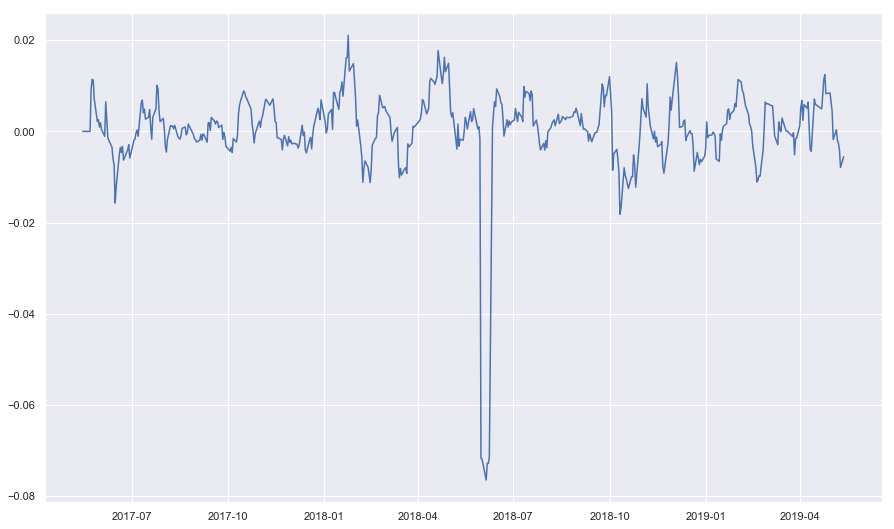

In [64]:
currDate = pd.to_datetime(filter_tcs['Date'])
currList = currDate.tolist()
plt.figure(figsize = (15, 9))
plt.plot(currList, rolling_avg_tcs.fillna(0).tolist())
plt.show()

# Query 2.8
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [65]:
nifty = pd.read_csv("Nifty50.csv")
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


<Figure size 1440x720 with 0 Axes>

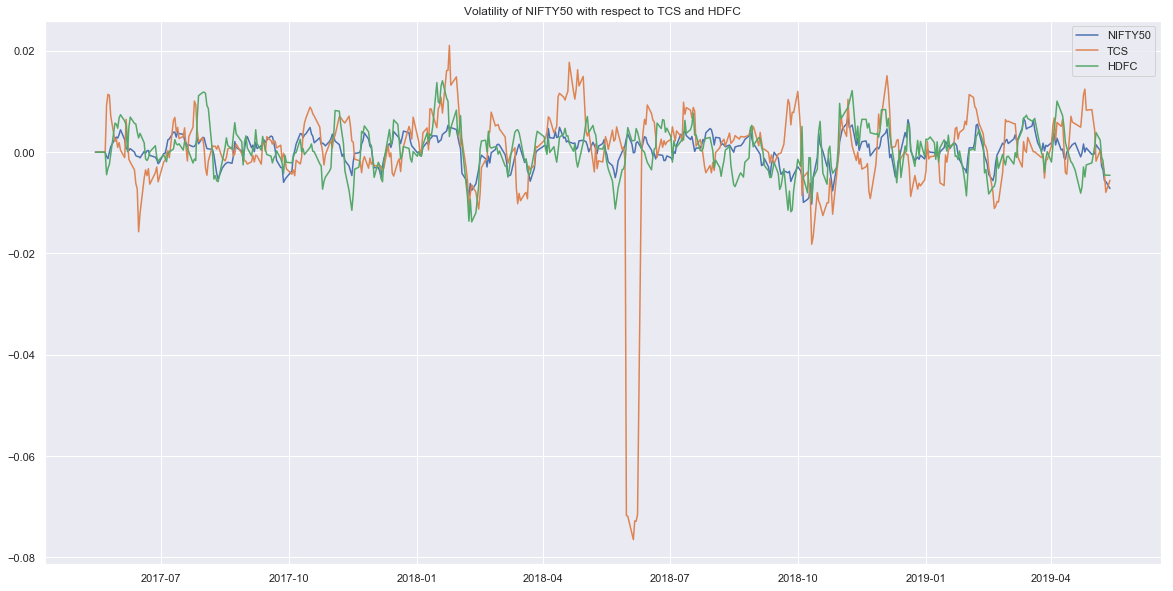

In [69]:
nifty_close = nifty['Close']
nifty_change = nifty_close.pct_change().fillna(0).rolling(7).mean().fillna(0)
nifDate = pd.to_datetime(nifty["Date"])
nifDate = nifDate.tolist()
plt.figure(figsize = (20,10))

tcsDate = pd.to_datetime(filter_tcs['Date'])
tcsList = tcsDate.tolist()
tcsPrice = filter_tcs['Close Price']
tcsChange = tcsPrice.pct_change().fillna(0).rolling(7).mean().fillna(0)
plt.figure(figsize = (20,10))

currDate = pd.to_datetime(filter_hdfc['Date'])
currList = currDate.tolist()
hdfcPrice = filter_hdfc['Close Price']
hdfcChange = hdfcPrice.pct_change().fillna(0).rolling(7).mean().fillna(0)

plt.title("Volatility of NIFTY50 with respect to TCS and HDFC")
plt.plot(nifDate, nifty_change, label = "NIFTY50")
plt.plot(tcsDate, tcsChange, label = "TCS")
plt.plot(currDate, hdfcChange, label = "HDFC")
plt.legend(loc = "upper right")
plt.show()

# Query 2.9
Trade Calls - Using Simple Moving Averages. Study about moving averages here.Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. One of the most widely used technical indicators.

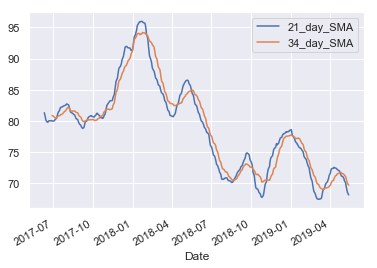

In [73]:
df.rename(columns={"Close Price": "Close_Price"},inplace = True)
df["21_day_SMA"] = df.Close_Price.rolling(21).mean()
df["34_day_SMA"] = df.Close_Price.rolling(34).mean()
df[["21_day_SMA", "34_day_SMA"]].plot()

In [74]:
prev_index       = df.index[0]
prev_row         = df[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
df['Trade_Call'] = 'HODL'

for index, row in df.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher       and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        df.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
signals = df[["Close_Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][ df['Trade_Call'] != "HODL" ]
signals

,Close_Price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-07-11,83.00,80.666667,80.572059,BUY
2017-08-11,76.55,81.454762,81.622059,SELL
2017-09-19,84.60,80.207143,80.161765,BUY
2017-10-19,81.50,80.561905,80.744118,SELL
2017-11-02,84.80,82.197619,81.879412,BUY
2018-02-05,85.00,93.235714,93.617647,SELL
2018-04-16,87.80,82.802381,82.663235,BUY
2018-05-17,81.65,84.766667,84.892647,SELL
2018-08-23,72.05,70.597619,70.517647,BUY


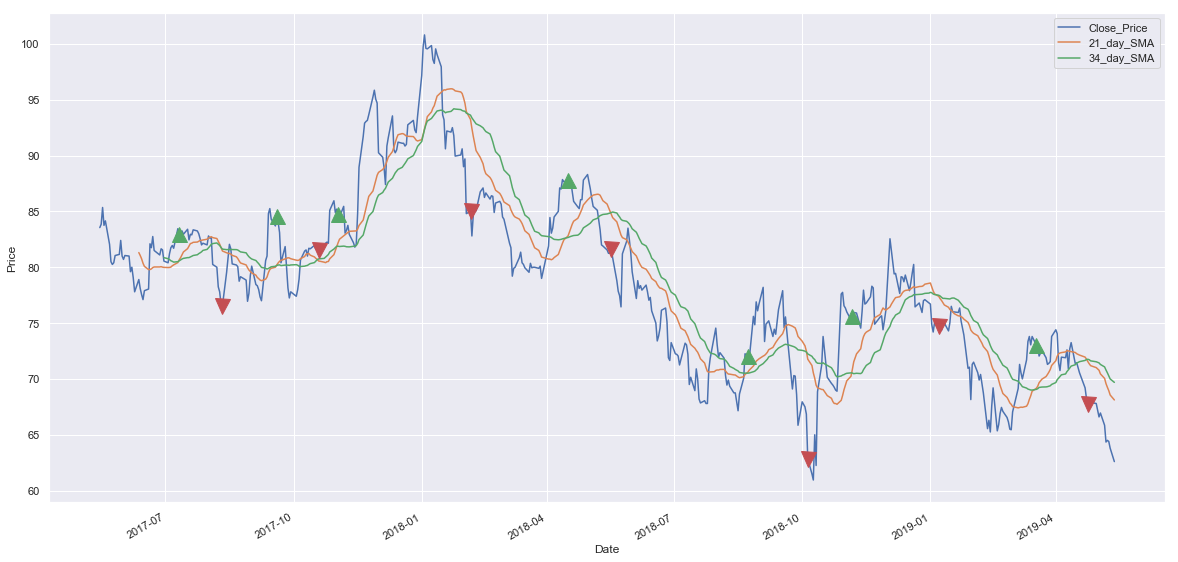

In [75]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

df[["Close_Price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot( df["Close_Price"][ df['Trade_Call'] == 'BUY' ].index, 
          df["Close_Price"][ df['Trade_Call'] == 'BUY' ], 
          '^', markersize=15, color='g' )

ax1.plot( df["Close_Price"][ df['Trade_Call'] == 'SELL' ].index, 
          df["Close_Price"][ df['Trade_Call'] == 'SELL' ], 
          'v', markersize=15, color='r' )

# Query 2.10 
Trade Calls - Using Bollinger Bands Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points- The 14 day rolling mean of the closing price (we call it the average) Upper band which is the rolling mean + 2 standard deviations away from the average. Lower band which is the rolling mean - 2 standard deviations away from the average. Average Daily stock price. Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

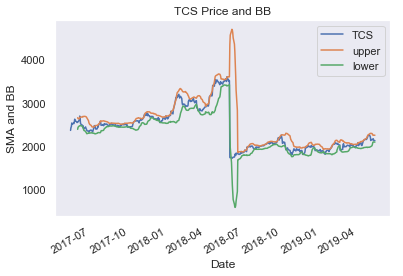

In [86]:
symbol = 'TCS'

# read csv file, use date as index and read close as a column
df = pd.read_csv('TCS.csv'.format(symbol), index_col='Date',
                 parse_dates=True, usecols=['Date', 'Close Price'],
                 na_values='nan')

# rename the column header with symbol name
df = df.rename(columns={'Close Price': symbol})
df.dropna(inplace=True)

# calculate Simple Moving Average with 14 days window
sma = df.rolling(window=14).mean()

# calculate the standar deviation
rstd = df.rolling(window=14).std()

upper_band = sma + 2 * rstd
upper_band = upper_band.rename(columns={symbol: 'upper'})
lower_band = sma - 2 * rstd
lower_band = lower_band.rename(columns={symbol: 'lower'})
df = df.join(upper_band).join(lower_band)
ax = df.plot(title='{} Price and BB'.format(symbol))
#ax.fill_between(df.index, lower_band['lower'], upper_band['upper'], color='#ADCCFF', alpha='0.4')
ax.set_xlabel('Date')
ax.set_ylabel('SMA and BB')
ax.grid()
plt.show()

In [87]:
df.to_csv('Module2Solution.csv')